                          MAJOR PROJECT
*******************************************************************************************
                          RAJKAMAL KUMAR 
                          NITJ CSE 2019-23


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.graphics.gofplots as sm
from sklearn.preprocessing import PowerTransformer
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
!pip install pandas_bokeh
import plotly.express as px
import pandas_bokeh
pandas_bokeh.output_notebook()
import pyarrow.parquet as pq



/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Loading BokehJS ...

<Figure size 2000x1000 with 0 Axes>

In [2]:
!pip install -q tflite_runtime

import numpy as np
import pandas as pd

import os
import json
import tensorflow as tf
import matplotlib.pyplot as plt
import tflite_runtime.interpreter as tflite
import tqdm

from tensorflow.keras.layers import Conv1D, TimeDistributed,MaxPooling2D,Flatten,LSTM,Dense,GlobalMaxPooling2D,Concatenate, Dropout,Bidirectional
from tensorflow.keras import Sequential,Model,Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam



tf.__version__

'2.11.0'

In [3]:
df = pd.read_csv('/kaggle/input/asl-signs/train.csv')
df

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
...,...,...,...,...
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room


In [4]:

df.shape

(94477, 4)

In [5]:

df.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [6]:

df.columns

Index(['path', 'participant_id', 'sequence_id', 'sign'], dtype='object')

In [7]:

df.dtypes

path              object
participant_id     int64
sequence_id        int64
sign              object
dtype: object

In [8]:

for col in df.columns:
    print(f"Column {col} has {df[col].isna().sum()} NaN values.")

Column path has 0 NaN values.
Column participant_id has 0 NaN values.
Column sequence_id has 0 NaN values.
Column sign has 0 NaN values.


In [9]:

df.describe()

,participant_id,sequence_id
count,94477.000000,9.447700e+04
mean,33678.632366,2.149377e+09
std,16138.124387,1.239239e+09
min,2044.000000,8.528200e+04
25%,25571.000000,1.078076e+09
50%,32319.000000,2.154240e+09
75%,49445.000000,3.218820e+09
max,62590.000000,4.294915e+09


In [10]:
df['sign'].value_counts()

listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: sign, Length: 250, dtype: int64

In [11]:

df['sequence_id'].sort_values(ascending=True).head()

90910     85282
3743     115459
7927     132875
18218    175180
25582    205620
Name: sequence_id, dtype: int64

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [13]:

df['sign'].unique()

array(['blow', 'wait', 'cloud', 'bird', 'owie', 'duck', 'minemy', 'lips',
       'flower', 'time', 'vacuum', 'apple', 'puzzle', 'mitten', 'there',
       'dry', 'shirt', 'owl', 'yellow', 'not', 'zipper', 'clean',
       'closet', 'quiet', 'have', 'brother', 'clown', 'cheek', 'cute',
       'store', 'shoe', 'wet', 'see', 'empty', 'fall', 'balloon',
       'frenchfries', 'finger', 'same', 'cry', 'hungry', 'orange', 'milk',
       'go', 'drawer', 'TV', 'another', 'giraffe', 'wake', 'bee', 'bad',
       'can', 'say', 'callonphone', 'finish', 'old', 'backyard', 'sick',
       'look', 'that', 'black', 'yourself', 'open', 'alligator', 'moon',
       'find', 'pizza', 'shhh', 'fast', 'jacket', 'scissors', 'now',
       'man', 'sticky', 'jump', 'sleep', 'sun', 'first', 'grass', 'uncle',
       'fish', 'cowboy', 'snow', 'dryer', 'green', 'bug', 'nap', 'feet',
       'yucky', 'morning', 'sad', 'face', 'penny', 'gift', 'night',
       'hair', 'who', 'think', 'brown', 'mad', 'bed', 'drink', 'stay',


In [14]:

df.sample(20)

,path,participant_id,sequence_id,sign
3040,train_landmark_files/18796/1125511442.parquet,18796,1125511442,shoe
67996,train_landmark_files/62590/3785431380.parquet,62590,3785431380,pig
9936,train_landmark_files/49445/1409742698.parquet,49445,1409742698,carrot
73853,train_landmark_files/25571/4025294742.parquet,25571,4025294742,cow
48559,train_landmark_files/61333/2984855345.parquet,61333,2984855345,hair
70887,train_landmark_files/2044/3904514863.parquet,2044,3904514863,wet
27575,train_landmark_files/28656/2138020879.parquet,28656,2138020879,stairs
71100,train_landmark_files/27610/3913057476.parquet,27610,3913057476,same
56909,train_landmark_files/49445/3327491475.parquet,49445,3327491475,room
72588,train_landmark_files/34503/3974251730.parquet,34503,3974251730,hen


<AxesSubplot:ylabel='participant_id'>

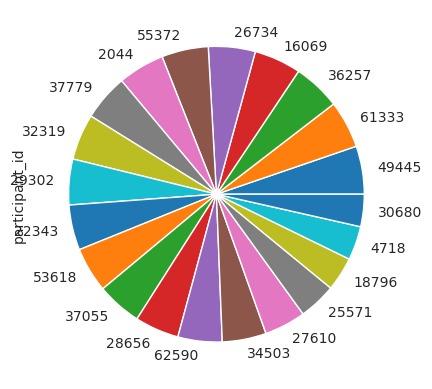

In [15]:
df["participant_id"].value_counts().plot(kind="pie")

In [16]:
p1 = pd.read_parquet('/kaggle/input/asl-signs/train_landmark_files/16069/100015657.parquet')

In [17]:
p1.head(100)

,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013
...,...,...,...,...,...,...,...
95,103,103-face-95,face,95,0.395360,0.473078,-0.024245
96,103,103-face-96,face,96,0.392179,0.473264,-0.026229
97,103,103-face-97,face,97,0.427866,0.411012,-0.040070
98,103,103-face-98,face,98,0.408463,0.411418,-0.026095


In [18]:
p1.dtypes

frame               int16
row_id             object
type               object
landmark_index      int16
x                 float64
y                 float64
z                 float64
dtype: object

In [19]:
p1.shape

(57015, 7)

In [20]:
p1.columns

Index(['frame', 'row_id', 'type', 'landmark_index', 'x', 'y', 'z'], dtype='object')

In [21]:
p1.value_counts()

frame  row_id        type  landmark_index  x         y         z        
103    103-face-0    face  0               0.437886  0.437599  -0.051134    1
173    173-face-266  face  266             0.496186  0.421939  -0.018227    1
       173-face-257  face  257             0.512373  0.336413   0.008372    1
       173-face-258  face  258             0.495359  0.337397   0.011067    1
       173-face-259  face  259             0.529047  0.339504   0.011252    1
                                                                           ..
138    138-face-107  face  107             0.392996  0.299609   0.010178    1
       138-face-108  face  108             0.393000  0.281931   0.029758    1
       138-face-109  face  109             0.390490  0.260074   0.046122    1
       138-face-11   face  11              0.429321  0.449152  -0.057240    1
207    207-pose-9    pose  9               0.498206  0.465364  -1.186551    1
Length: 53193, dtype: int64

In [22]:
p1['type'].unique()

array(['face', 'left_hand', 'pose', 'right_hand'], dtype=object)

In [23]:
for col in p1.columns:
    print(f"Column {col} has {p1[col].isna().sum()} NaN values.")

Column frame has 0 NaN values.
Column row_id has 0 NaN values.
Column type has 0 NaN values.
Column landmark_index has 0 NaN values.
Column x has 3822 NaN values.
Column y has 3822 NaN values.
Column z has 3822 NaN values.


In [24]:
x_mean=p1["x"].mean()
print("The mean of column x is  ",x_mean)

The mean of column x is   0.4382832172172145


In [25]:
p1["x"].fillna(x_mean,inplace=True)

In [26]:
p1[p1['y'].isnull()]

,frame,row_id,type,landmark_index,x,y,z
522,103,103-right_hand-0,right_hand,0,0.438283,NaN,NaN
523,103,103-right_hand-1,right_hand,1,0.438283,NaN,NaN
524,103,103-right_hand-2,right_hand,2,0.438283,NaN,NaN
525,103,103-right_hand-3,right_hand,3,0.438283,NaN,NaN
526,103,103-right_hand-4,right_hand,4,0.438283,NaN,NaN
...,...,...,...,...,...,...,...
57010,207,207-right_hand-16,right_hand,16,0.438283,NaN,NaN
57011,207,207-right_hand-17,right_hand,17,0.438283,NaN,NaN
57012,207,207-right_hand-18,right_hand,18,0.438283,NaN,NaN
57013,207,207-right_hand-19,right_hand,19,0.438283,NaN,NaN


In [27]:
y_mean= p1["y"].mean()
print("The median of the y column is ",y_mean)


The median of the y column is  0.4574826978752259


In [28]:
p1["y"].fillna(y_mean,inplace=True)

In [29]:
for col in p1.columns:
    print(f"Column {col} has {p1[col].isna().sum()} NaN values.")

Column frame has 0 NaN values.
Column row_id has 0 NaN values.
Column type has 0 NaN values.
Column landmark_index has 0 NaN values.
Column x has 0 NaN values.
Column y has 0 NaN values.
Column z has 3822 NaN values.


In [30]:
cols_of_interest = ["x", "y","z"]
correlation_between_cols = p1[cols_of_interest].corr()
print(correlation_between_cols)


          x         y         z
x  1.000000  0.147608 -0.046373
y  0.147608  1.000000  0.056912
z -0.046373  0.056912  1.000000


<AxesSubplot:>

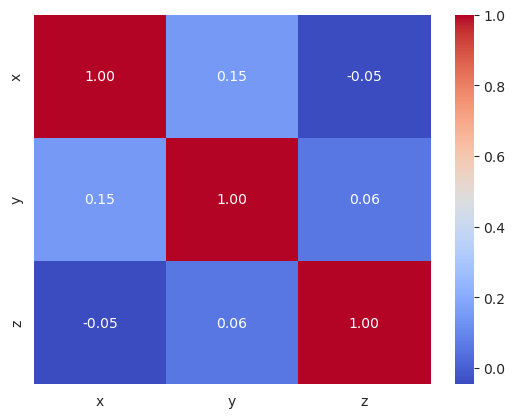

In [31]:
sns.heatmap(correlation_between_cols , annot=True, cmap='coolwarm', fmt='.2f')


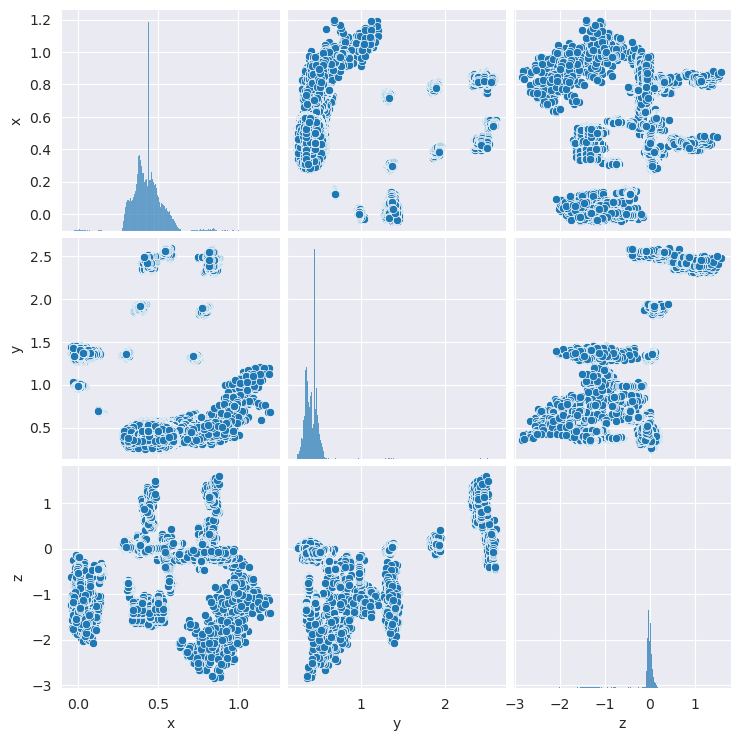

In [32]:
sns.pairplot(p1[['x','y','z']])

<AxesSubplot:>

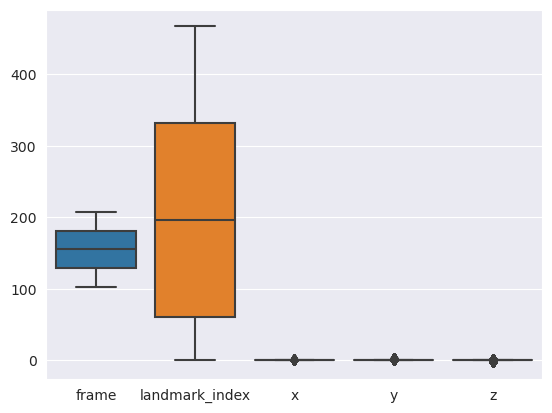

In [33]:
sns.boxplot(p1)

In [34]:
p1.groupby(['frame']).count()

,row_id,type,landmark_index,x,y,z
frame,,,,,,
103,543,543,543,543,543,522
104,543,543,543,543,543,522
105,543,543,543,543,543,522
106,543,543,543,543,543,522
107,543,543,543,543,543,501
...,...,...,...,...,...,...
203,543,543,543,543,543,501
204,543,543,543,543,543,501
205,543,543,543,543,543,501


<AxesSubplot:title={'center':'Distribution of Types in p1'}, ylabel='type'>

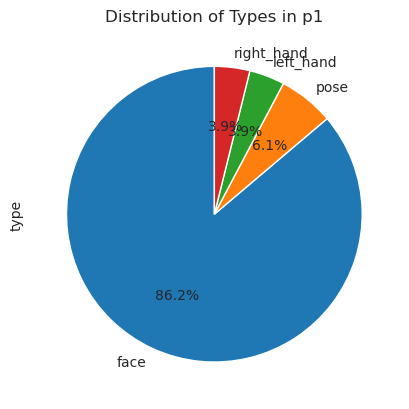

In [35]:
p1["type"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution of Types in p1")


In [36]:
p1.loc[p1["type"]=="face"].plot_bokeh.scatter(
x="x",
y="y",
category="type")


Figure(id='1003', ...)

In [37]:
p1.loc[p1["type"]=="left_hand"].plot_bokeh.scatter(
x="x",
y="y",
category="type")


Figure(id='1121', ...)

In [38]:
p1.loc[p1["type"]=="pose"].plot_bokeh.scatter(
x="x",
y="y",
category="type")


Figure(id='1249', ...)

In [39]:
train = pd.read_csv('/kaggle/input/asl-signs/train.csv')


In [40]:
train.tail(10)

,path,participant_id,sequence_id,sign
94467,train_landmark_files/30680/999471066.parquet,30680,999471066,toothbrush
94468,train_landmark_files/49445/999514664.parquet,49445,999514664,carrot
94469,train_landmark_files/53618/999555281.parquet,53618,999555281,milk
94470,train_landmark_files/61333/999641996.parquet,61333,999641996,why
94471,train_landmark_files/25571/999740509.parquet,25571,999740509,scissors
94472,train_landmark_files/53618/999786174.parquet,53618,999786174,white
94473,train_landmark_files/26734/999799849.parquet,26734,999799849,have
94474,train_landmark_files/25571/999833418.parquet,25571,999833418,flower
94475,train_landmark_files/29302/999895257.parquet,29302,999895257,room
94476,train_landmark_files/36257/999962374.parquet,36257,999962374,happy


In [41]:
json_file = open('/kaggle/input/asl-signs/sign_to_prediction_index_map.json')
sign_to_prediction_index_map = json.load(json_file)
sign_to_prediction_map = {}
for i, j in sign_to_prediction_index_map.items():
    sign_to_prediction_map[j]=i

In [42]:
sign_to_prediction_index_map

{'TV': 0,
 'after': 1,
 'airplane': 2,
 'all': 3,
 'alligator': 4,
 'animal': 5,
 'another': 6,
 'any': 7,
 'apple': 8,
 'arm': 9,
 'aunt': 10,
 'awake': 11,
 'backyard': 12,
 'bad': 13,
 'balloon': 14,
 'bath': 15,
 'because': 16,
 'bed': 17,
 'bedroom': 18,
 'bee': 19,
 'before': 20,
 'beside': 21,
 'better': 22,
 'bird': 23,
 'black': 24,
 'blow': 25,
 'blue': 26,
 'boat': 27,
 'book': 28,
 'boy': 29,
 'brother': 30,
 'brown': 31,
 'bug': 32,
 'bye': 33,
 'callonphone': 34,
 'can': 35,
 'car': 36,
 'carrot': 37,
 'cat': 38,
 'cereal': 39,
 'chair': 40,
 'cheek': 41,
 'child': 42,
 'chin': 43,
 'chocolate': 44,
 'clean': 45,
 'close': 46,
 'closet': 47,
 'cloud': 48,
 'clown': 49,
 'cow': 50,
 'cowboy': 51,
 'cry': 52,
 'cut': 53,
 'cute': 54,
 'dad': 55,
 'dance': 56,
 'dirty': 57,
 'dog': 58,
 'doll': 59,
 'donkey': 60,
 'down': 61,
 'drawer': 62,
 'drink': 63,
 'drop': 64,
 'dry': 65,
 'dryer': 66,
 'duck': 67,
 'ear': 68,
 'elephant': 69,
 'empty': 70,
 'every': 71,
 'eye': 72,
 

In [43]:
import pandas as pd
import numpy as np
import json

train = pd.read_csv('/kaggle/input/asl-signs/train.csv')


with open('/kaggle/input/asl-signs/sign_to_prediction_index_map.json') as f:
    sign_to_prediction_index_map = json.load(f)

prediction_to_sign_map = {}
for i, j in sign_to_prediction_index_map.items():
    prediction_to_sign_map[j] = i

ROWS_PER_FRAME = 543

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)




In [44]:
def load_relevant_data_subset_train(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns).fillna(0)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

In [45]:
files = train['path'].values
X = np.zeros((len(train), 543, 3))
y = np.zeros((len(train)))
for i, fname in tqdm.tqdm(enumerate(files)):
    arr = load_relevant_data_subset_train('/kaggle/input/asl-signs/' + fname)
    X[i, :, :] = np.mean(arr, axis=0)
    y[i] = sign_to_prediction_index_map[train.loc[i, 'sign']]
y = y.astype('int32')
np.save('X.npy', X)
np.save('y.npy', y)
X_train = X[:89753, :, :]
y_train = y[:89753]
X_cv = X[89753:, :, :]
y_cv = y[89753:]


#tqdm.tqdm() . file processing  ki progress bhi to dekhni hai
#float64 to int32 memory usage kam krni hai performace kha se aayega 

94477it [24:10, 65.13it/s]


In [46]:
X_train

array([[[ 0.52765715,  0.37799075, -0.03728105],
        [ 0.5251776 ,  0.34640211, -0.06119015],
        [ 0.52835715,  0.35615081, -0.0347196 ],
        ...,
        [ 0.13420019,  0.21228456, -0.03837654],
        [ 0.14469755,  0.20351398, -0.0434552 ],
        [ 0.15583248,  0.19811937, -0.04688056]],

       [[ 0.56010526,  0.50728822, -0.05165111],
        [ 0.55275178,  0.46723697, -0.07367232],
        [ 0.55391449,  0.48089406, -0.04462063],
        ...,
        [ 0.05285492,  0.11605947, -0.01730338],
        [ 0.06151751,  0.11655395, -0.01873624],
        [ 0.06911661,  0.11730912, -0.01933736]],

       [[ 0.42119411,  0.45095339, -0.0542616 ],
        [ 0.41498089,  0.40822628, -0.07477555],
        [ 0.41923973,  0.4248634 , -0.04694982],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]],

       ...,

       [[ 0.47843519,  0.48995385, -0.02266912],
        [ 0

In [47]:
y_train

array([ 25, 232,  48, ...,  78, 233, 150], dtype=int32)

In [48]:
def connvolutional1D_Lstm(inputs,filters,kernel_size,lstm_nodes,num_lstm,flag=False):
    for i,j in enumerate(filters):
        inputs = Conv1D(filters=j,kernel_size=kernel_size[i])(inputs) 
        
    if flag:
        if len(lstm_nodes)>1:
            for i in lstm_nodes[:-1]:
                inputs = Bidirectional(LSTM(i,return_sequences=True))(inputs)
            inputs = Bidirectional(LSTM(lstm_nodes[-1]))(inputs)    
            return inputs
        else:
            inputs = Bidirectional(LSTM(lstm_nodes[0]))(inputs)
            return inputs
    else:
        if len(lstm_nodes)>1:
            for i in lstm_nodes[:-1]:
                inputs = LSTM(i,return_sequences=True)(inputs)
            inputs = LSTM(lstm_nodes[-1])(inputs)    
            return inputs
        else:
            inputs = LSTM(lstm_nodes[0])(inputs)
            return inputs
        

In [49]:
def nn_model():
    inputs = tf.keras.Input(shape=(543,3),name='inputty')
    face = inputs[:,:468,:]
    l_hand = inputs[:,468:468+21,:]
    pose = inputs[:,468+21:468+21+33,:]
    r_hand = inputs[:,468+21+33:468+21+33+21,:]
    
    face = connvolutional1D_Lstm(face,[16,32,64],[5,3,3],[128],1,True)
    l_hand = connvolutional1D_Lstm(l_hand,[16,32,64],[5,3,3],[128],1,True)
    pose = connvolutional1D_Lstm(pose,[16,32,64],[5,3,3],[128],1,True)
    r_hand = connvolutional1D_Lstm(r_hand,[16,32,64],[5,3,3],[128],1,True)
    
    X = Concatenate()([face,l_hand,pose,r_hand])
    X = Dropout(0.2)(X)
    outputs = Dense(units=250,activation='softmax',name='outputty')(X)
    model = Model(inputs=inputs, outputs = outputs)
    model.compile(loss =SparseCategoricalCrossentropy(), optimizer =Adam(), metrics=['accuracy'])#,SparseTopKCategoricalAccuracy(10,name='sparse_top_10'),SparseTopKCategoricalAccuracy(20,name='sparse_top_20'),SparseTopKCategoricalAccuracy(50,name='sparse_top_50')])
    model.summary()
    return model


In [50]:

tf.keras.backend.clear_session()
model = nn_model()
epoch = 20
history = model.fit(X_train,y_train,validation_data = (X_cv,y_cv),epochs=epoch,batch_size=64,callbacks=[tf.keras.callbacks.ModelCheckpoint('v23.h5'),tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.8,patience=2,verbose=1),tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=10,verbose=1,restore_best_weights=True)])
tf.keras.models.save_model(model,'/kaggle/working/raj_nitj_model')


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputty (InputLayer)           [(None, 543, 3)]     0           []                               
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 468, 3)      0           ['inputty[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.__operators__.getitem_1 (Sl  (None, 21, 3)       0           ['inputty[0][0]']                
 icingOpLambda)                                                                                   
                                                                                              